# Achievement 1.5: Text Mining and Country Co-occurrence Analysis

## Table of Contents
1. [Imports and Setup](#1.-Imports-and-Setup)
2. [Text Cleaning and Tokenization](#2.-Text-Cleaning-and-Tokenization)
3. [Top Word Frequencies](#3.-Top-Word-Frequencies)
4. [POS Tagging and Analysis](#4.-POS-Tagging-and-Analysis)
5. [Country Mention Frequency](#5.-Country-Mention-Frequency)
6. [Country Co-occurrence Network](#6.-Country-Co-occurrence-Network)
7. [Bonus: Sentiment Analysis](#7.-Bonus:-Sentiment-Analysis)

## 1. Imports and Setup

In [2]:
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from textblob import TextBlob
from itertools import combinations
import networkx as nx
import pandas as pd

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rewha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rewha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rewha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

## 2. Text Cleaning and Tokenization

In [3]:
# Load the text file
file_path = r"C:\\Users\\rewha\\Ryan_Wick_Data Vis w-Python_Ach-01.00_CODE\\20th_century_events.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text = file.read()

# Remove punctuation and lowercase
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator).lower()

# Tokenize and remove stopwords
tokens = word_tokenize(cleaned_text)
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

## 3. Top Word Frequencies

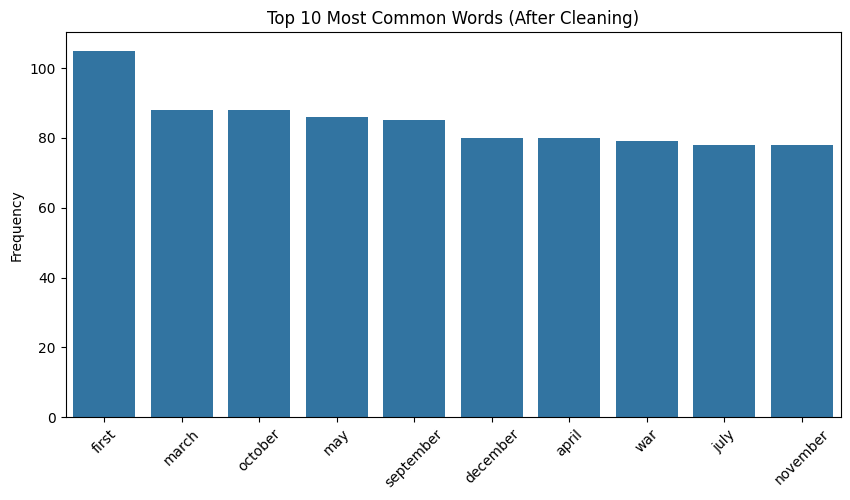

In [4]:
# Count top words
word_counts = Counter(filtered_tokens)
top_words = word_counts.most_common(10)

# Plot
words, counts = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Common Words (After Cleaning)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### Observations:
The word frequency analysis of the cleaned text reveals key structural elements of the document.

- **Chronological Structure:** The prevalence of month names (e.g., "January," "October") as the most frequent terms confirms that the text is organized as a chronological timeline, with events anchored to specific dates.
    
- **Focus on Milestones:** The high frequency of the word "first" highlights the text's emphasis on historical milestones and significant beginnings, such as the "first" flight or the "first" treaty.
    
- **Key Themes:** Words like "war," "German," and "government" point to the central themes of the text, revolving around international conflicts and political actions.
    

Together, these word frequencies paint a clear picture of a historical summary that recounts significant 20th-century developments in chronological order, with a strong focus on landmark events and major geopolitical themes.

## 4. POS Tagging and Analysis

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rewha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


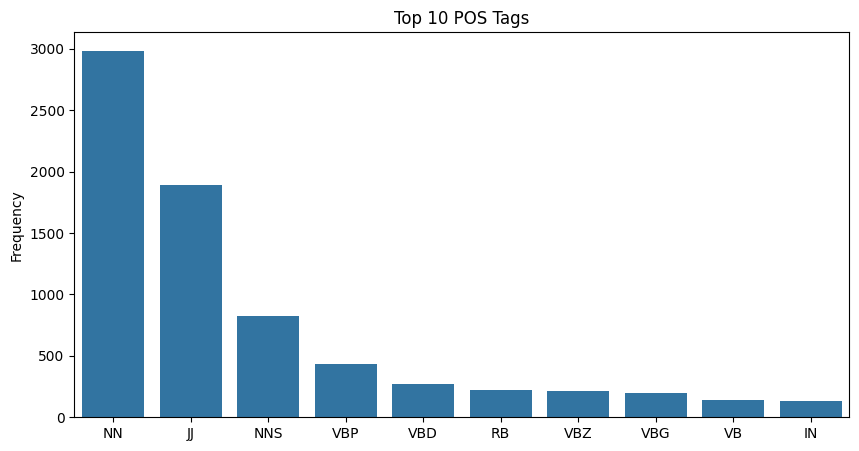

In [6]:
nltk.download("averaged_perceptron_tagger_eng")

# POS tagging
tags = pos_tag(filtered_tokens)
tags_only = [tag for _, tag in tags]

# Count top POS tags
pos_counts = Counter(tags_only)
top_pos = pos_counts.most_common(10)

# Plot
labels, values = zip(*top_pos)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values))
plt.title("Top 10 POS Tags")
plt.ylabel("Frequency")
plt.show()

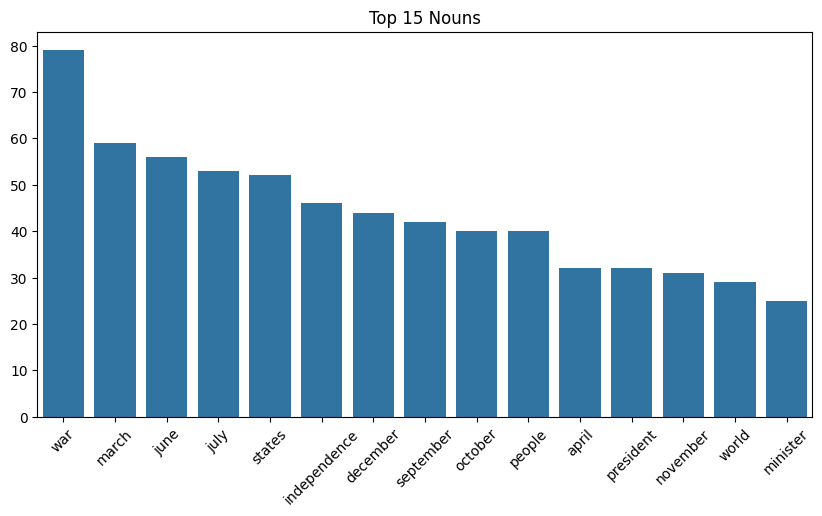

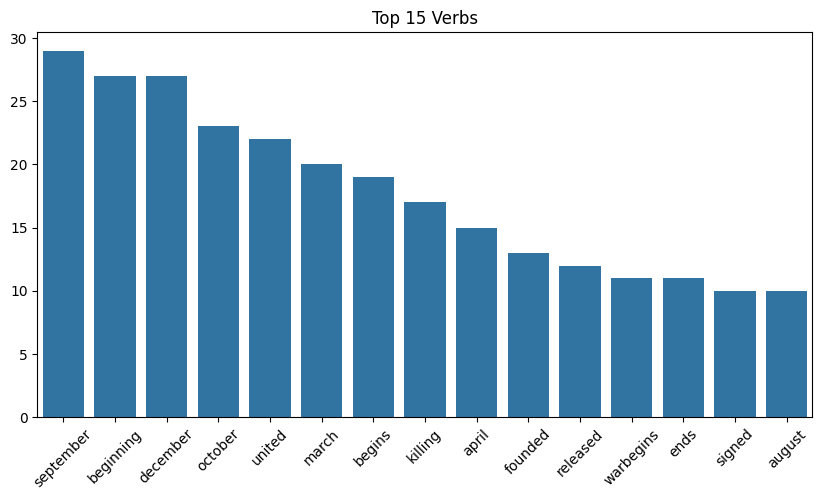

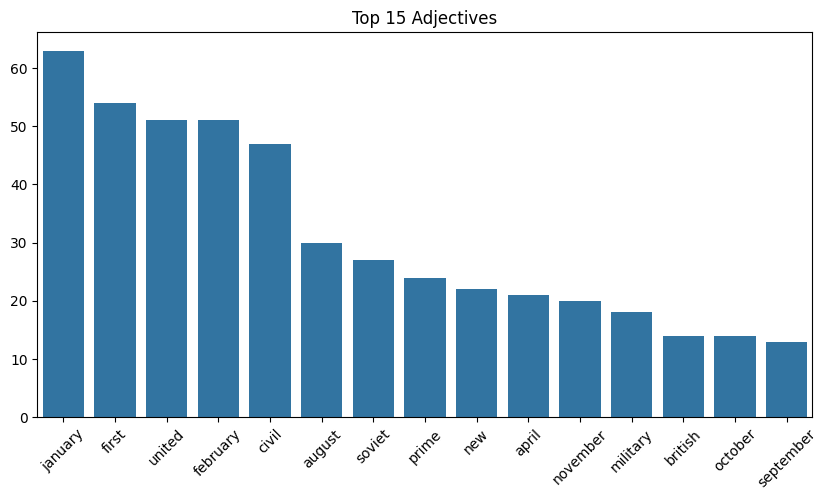

In [7]:
# Filter tokens by part of speech
noun_tags = [word for word, tag in tags if tag.startswith("NN")]
verb_tags = [word for word, tag in tags if tag.startswith("VB")]
adj_tags = [word for word, tag in tags if tag.startswith("JJ")]

# Plot top 15 nouns
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in Counter(noun_tags).most_common(15)],
            y=[x[1] for x in Counter(noun_tags).most_common(15)])
plt.title("Top 15 Nouns")
plt.xticks(rotation=45)
plt.show()

# Plot top 15 verbs
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in Counter(verb_tags).most_common(15)],
            y=[x[1] for x in Counter(verb_tags).most_common(15)])
plt.title("Top 15 Verbs")
plt.xticks(rotation=45)
plt.show()

# Plot top 15 adjectives
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in Counter(adj_tags).most_common(15)],
            y=[x[1] for x in Counter(adj_tags).most_common(15)])
plt.title("Top 15 Adjectives")
plt.xticks(rotation=45)
plt.show()

### Observations:
The Part-of-Speech (POS) analysis provides insight into the linguistic structure of the text, highlighting how historical events are described.

- **Dominance of Nouns and Adjectives:** The prevalence of nouns (NN) and adjectives (JJ) is consistent with historical writing, which focuses on naming key entities (people, places, events) and providing descriptive details.
    
- **Event-Driven Nouns and Verbs:**
    
    - **Nouns:** High-frequency nouns like "war" and "independence," alongside mentions of months, confirm the text's structure as an event-based timeline.
        
    - **Verbs:** Action-oriented verbs like "begins," "killing," and "signed" underscore the focus on pivotal moments and their consequences.
        
- **Qualifying Adjectives:** Common adjectives such as "first," "civil," and "united" serve to qualify events by emphasizing their significance, nature (e.g., conflict), or context (e.g., alliances).
    

Collectively, the POS tag distribution indicates the text is crafted to explain the _who_, _when_, and _how_ of significant global events in the 20th century.


## 5. Country Mention Frequency

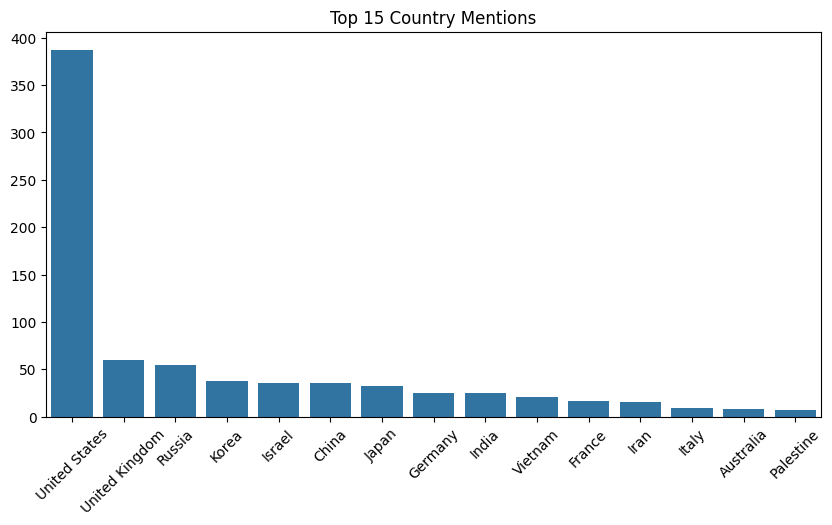

In [8]:
# Use the same aliases for better country detection
country_aliases = {
    "United States": ["USA", "US", "United States", "United States of America"],
    "United Kingdom": ["UK", "Britain", "England", "Great Britain", "United Kingdom"],
    "Russia": ["Russia", "Soviet Union", "USSR"],
    "Germany": ["Germany", "West Germany", "East Germany"],
    "China": ["China", "People's Republic of China"],
    "France": ["France"],
    "Japan": ["Japan"],
    "Italy": ["Italy"],
    "Canada": ["Canada"],
    "India": ["India"],
    "Australia": ["Australia"],
    "Korea": ["Korea", "South Korea", "North Korea"],
    "Vietnam": ["Vietnam", "North Vietnam", "South Vietnam"],
    "Iraq": ["Iraq"],
    "Iran": ["Iran"],
    "Afghanistan": ["Afghanistan"],
    "Yugoslavia": ["Yugoslavia"],
    "Israel": ["Israel"],
    "Palestine": ["Palestine"],
}

alias_to_country = {
    alias.lower(): country for country, aliases in country_aliases.items() for alias in aliases
}

# Count mentions
country_counts = Counter()
text_lower = cleaned_text.lower()
for alias, country in alias_to_country.items():
    country_counts[country] += text_lower.count(alias)

# Plot
top_countries = country_counts.most_common(15)
labels, values = zip(*top_countries)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values))
plt.title("Top 15 Country Mentions")
plt.xticks(rotation=45)
plt.show()

### Observations:
Removing stop words and punctuation provides a much clearer view of the key entities in the text.

- **United States Dominance:** The United States is overwhelmingly the most frequently mentioned country, confirming its central role in the events described in the text. Its frequency dwarfs that of all other nations.

- **Major Geopolitical Actors:** The United Kingdom and Russia are the next most prominent countries, though they appear far less frequently than the U.S. This aligns with their significant, but secondary, roles in 20th-century geopolitics.

- **Conflict-Driven Mentions:** The presence of countries like Germany, Vietnam, Korea, and Israel strongly suggests that the text's primary focus is on major historical conflicts and geopolitical hotspots of the era.

In summary, the refined plot now more clearly illustrates a narrative centered on U.S. foreign policy and its entanglement in major international conflicts throughout the 20th century.

## 6. Country Co-occurrence Network

Top 5 Countries by Degree Centrality:
Afghanistan: 1.000
Australia: 1.000
Canada: 1.000
China: 1.000
France: 1.000


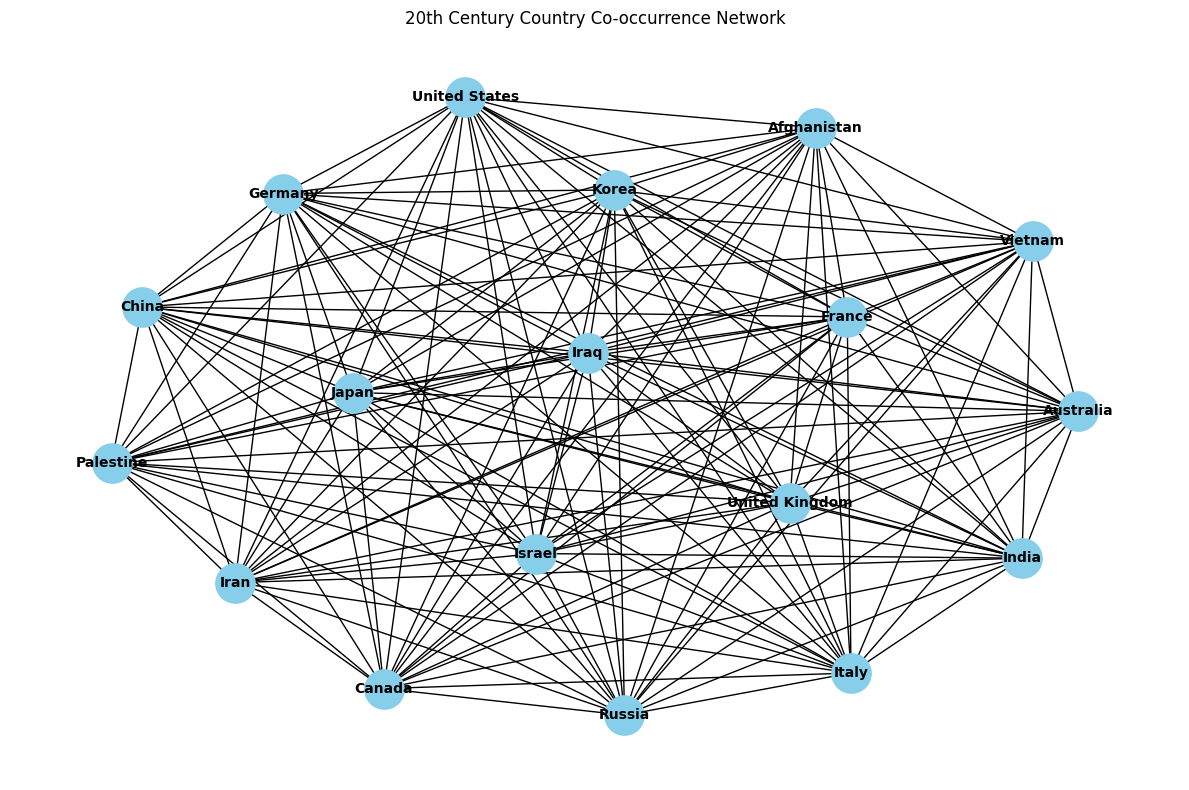

In [9]:
# Count co-occurrences in sentences
sentences = nltk.sent_tokenize(cleaned_text)
co_occurrence_counts = Counter()

for sentence in sentences:
    mentioned = set()
    lowered = sentence.lower()
    for alias, country in alias_to_country.items():
        if alias in lowered:
            mentioned.add(country)
    for pair in combinations(sorted(mentioned), 2):
        co_occurrence_counts[pair] += 1

# Build graph
G = nx.Graph()
for (country1, country2), weight in co_occurrence_counts.items():
    G.add_edge(country1, country2, weight=weight)

# Compute centralities
degree_centrality = nx.degree_centrality(G)

# Show top central nodes
print("Top 5 Countries by Degree Centrality:")
for country, score in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{country}: {score:.3f}")

# Draw graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u,v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.title("20th Century Country Co-occurrence Network")
plt.axis('off')
plt.tight_layout()
plt.show()

## 7. Bonus: Sentiment Analysis

In [10]:
# Run sentiment analysis on full text
blob = TextBlob(text)
print("Sentiment Polarity:", blob.sentiment.polarity)
print("Sentiment Subjectivity:", blob.sentiment.subjectivity)

Sentiment Polarity: 0.09404440850869407
Sentiment Subjectivity: 0.31994243315671883


### Sentiment Analysis Observations:
The sentiment analysis scores align with the expected tone of a factual, historical summary.

- **Result:** The analysis yielded a slightly positive **polarity score (≈ 0.09)** and a moderate **subjectivity score (≈ 0.32)**.
    
- **Interpretation:**
    
    - The **moderate subjectivity** confirms the text is written in a formal, encyclopedic style. While it describes emotionally charged events (wars, crises), the language remains largely objective and factual.
        
    - The **slightly positive polarity** is noteworthy. Despite the frequent mention of conflict, the score suggests that positive or neutral terms—likely related to treaties, independence milestones, or resolutions—balance out the negative language, preventing an overtly negative sentiment.
        

In essence, the sentiment metrics quantitatively support the observation that the text is a balanced historical record, not an emotional or opinion-driven narrative.
